In [21]:
%load_ext autoreload

from sax_arm import SAX_ARM

import pandas as pd

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='talk', fscale=1.4, spines=False, gridlines='--')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Data

In [22]:
df = pd.read_csv('dataset/data_electricity.csv')
df.head()

,t,temp_Lille,temp_Aix,mean_national_temp,humidity_Lille,humidity_Aix,consumption_Bordeaux,consumption_Angers,consumption_Paris,consumption_Lille,consumption_Aix
0,2016-11-01 00:00:00,8.3,13.7,11.1,95.0,88.0,143,74,168,100,93
1,2016-11-01 01:00:00,8.0,13.7,11.1,98.0,88.0,141,60,162,101,94
2,2016-11-01 02:00:00,6.8,13.7,11.0,97.0,88.0,142,60,164,100,96
3,2016-11-01 03:00:00,7.5,13.7,10.9,99.0,88.0,139,60,162,101,95
4,2016-11-01 04:00:00,6.1,13.7,10.8,98.0,88.0,154,60,164,100,100


# SAX-ARM

In [26]:
%autoreload

sax_arm = SAX_ARM(df, w=20, a=10, min_supp=0.01, min_conf=0.5)
sax_arm.process()

## Plots

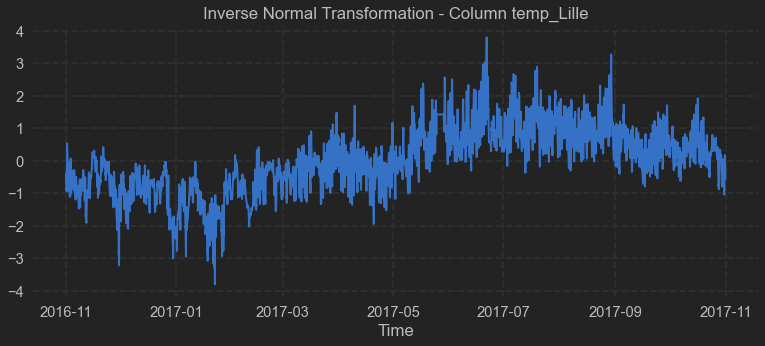

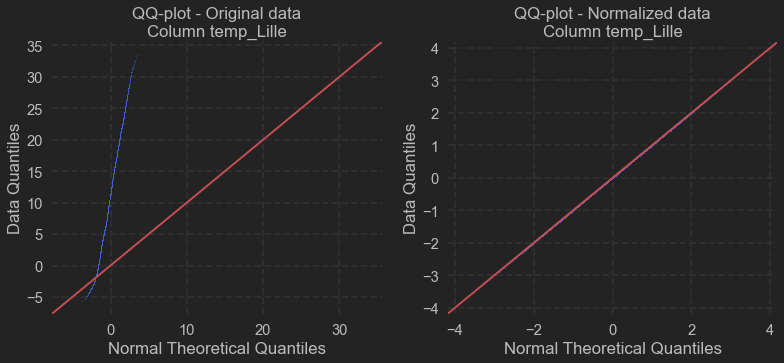

In [27]:
sax_arm.sax.plot_normalization(i_plot=1)

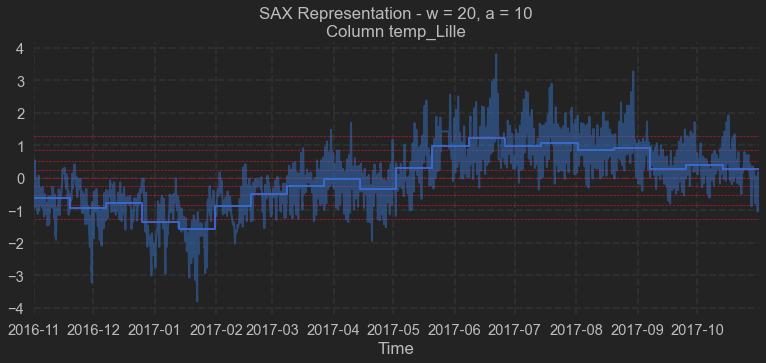

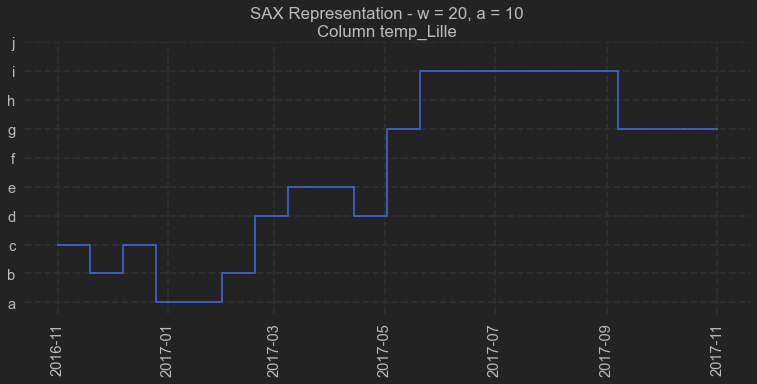

In [30]:
sax_arm.sax.plot_discretization(i_plot=1)

## Rules

In [31]:
sax_arm.get_support()

,support(a),support(j),Sum
time_series_id,,,
consumption_Aix,0.10,0.05,0.15
mean_national_temp,0.10,0.05,0.15
consumption_Angers,0.05,NaN,NaN
consumption_Lille,0.05,NaN,NaN
consumption_Paris,0.05,NaN,NaN
temp_Aix,0.10,NaN,NaN
temp_Lille,0.10,NaN,NaN


In [32]:
sax_arm.get_rules()

,Rule,Support,Confidence,Lift
23,"{('temp_Lille', 'a')} --> {('temp_Aix', 'a')}",0.4,1.0,2.5
22,"{('temp_Aix', 'a')} --> {('temp_Lille', 'a')}",0.4,1.0,2.5
21,"{('temp_Lille', 'a')} --> {('mean_national_tem...",0.4,1.0,2.5
20,"{('mean_national_temp', 'a')} --> {('temp_Lill...",0.4,1.0,2.5
19,"{('temp_Aix', 'a')} --> {('mean_national_temp'...",0.4,1.0,2.5
18,"{('mean_national_temp', 'a')} --> {('temp_Aix'...",0.4,1.0,2.5
1,"{('consumption_Angers', 'a')} --> {('consumpti...",0.2,1.0,2.5
17,"{('consumption_Paris', 'a')} --> {('consumptio...",0.2,1.0,5.0
16,"{('consumption_Lille', 'a')} --> {('consumptio...",0.2,1.0,5.0
15,"{('consumption_Paris', 'a')} --> {('consumptio...",0.2,1.0,5.0
